<a href="https://colab.research.google.com/github/alicelindel3/twitter/blob/main/section_4/02_reply_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# seq2seqモデルの訓練
対話文のデータセットを使って、Seq2Seqのモデルを訓練します。

## ライブラリのインストール
分かち書きのためにjanomeを、テキストデータの前処理のためにtorchtextをインストールします。

In [1]:
!pip install janome==0.4.1
!pip install torchvision==0.7.0
!pip install torchtext==0.7.0
!pip install torch==1.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.7 MB 306 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.9 MB 4.8 MB/s 
     |████████████████████████████████| 748.8 MB 19 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.1+cu113
    Uninstalling torchvision-0.13.1+cu113:
      Successfully uninstalled torchvision-0.13.1+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.6.0 which is incompatible.
tor

## Google ドライブとの連携  
以下のコードを実行し、認証コードを使用してGoogle ドライブをマウントします。

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## 対話文の取得
Googleドライブから、対話文のデータを取り出してデータセットを作成します。



In [3]:
import torchtext
from janome.tokenizer import Tokenizer

path = "/content/drive/My Drive/Colab Notebooks/live_ai_data/"  # 保存場所を指定

j_tk = Tokenizer()
def tokenizer(text): 
    return [tok for tok in j_tk.tokenize(text, wakati=True)]  # 内包表記
 
# データセットの列を定義
input_field = torchtext.data.Field(  # 入力文
    sequential=True,  # データ長さが可変かどうか
    tokenize=tokenizer,  # 前処理や単語分割などのための関数
    batch_first=True,  # バッチの次元を先頭に
    lower=True  # アルファベットを小文字に変換
    )

reply_field = torchtext.data.Field(  # 応答文
    sequential=True,  # データ長さが可変かどうか
    tokenize=tokenizer,  # 前処理や単語分割などのための関数
    init_token = "<sos>",  # 文章開始のトークン
    eos_token = "<eos>",  # 文章終了のトークン
    batch_first=True,  # バッチの次元を先頭に
    lower=True  # アルファベットを小文字に変換
    )
 
# csvファイルからデータセットを作成
train_data, test_data = torchtext.data.TabularDataset.splits(
    path=path,
    train="dialogues_train.csv",
    validation="dialogues_test.csv",
    format="csv",
    fields=[("inp_text", input_field), ("rep_text", reply_field)]  # 列の設定
    )

/usr/local/lib/python3.7/dist-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('{} class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.'.format(self.__class__.__name__), UserWarning)
/usr/local/lib/python3.7/dist-packages/torchtext/data/example.py:68: UserWarning: Example class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('Example class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.', UserWarning)
/usr/local/lib/python3.7/dist-packages/torchtext/data/example.py:78: UserWarning: Example class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes f

## データセットの内容を表示
データセットの内容を一部表示します。

In [4]:
for example in train_data.examples[:10]:
    print(example.inp_text, example.rep_text)

['そうですね', '。'] ['ありがとう', 'ござい', 'ます']
['こんにちは', '。', '声', 'かけ', 'て', 'くれる', 'の', 'を', '待っ', 'て', 'たん', 'だ', '。'] ['こんにちは']
['バラエティー', '番組', 'は', '面白い', 'です', 'ね'] ['そうですね', '。', '特に', '、', '鉄腕', 'dash', 'は', '面白い', 'です', '。']
['ファッション', '雑誌', 'が', '出る', 'ん', 'です', 'か', '？'] ['あと', '音楽', '雑誌', 'も', 'よく', '読み', 'ます', '。']
['フルーツ', 'の', '中', 'だ', 'と', '桃', 'の', '方', 'が', '好き', 'です', '。'] ['固い', 'の', 'が', '好き', 'です', 'ね']
['研究', 'です'] ['あ', '、', '研究', '者', 'な', 'ん', 'です', 'ね', '。']
['香り', 'が', '命', 'な', 'ん', 'です', 'が', 'ねぇ'] ['そう', 'な', 'ん', 'です', 'ね']
['スイカ', '！', '\u3000', '最高', 'だ', 'よ', 'ね', '！'] ['スイカ', 'は', 'うまい', 'です', 'ね']
['こんばんは', 'ー', '。', '気軽', 'に', '声', 'かけ', 'て', 'ね', '。'] ['トイレ', 'に', '行き', 'たい', 'なー']
['退屈', 'に', '耐える', 'の', 'です'] ['あえて', '耐える', 'ん', 'です', 'ね', '。']


## 単語とインデックスの対応
単語にインデックスを割り振り、辞書として格納します。

In [5]:
input_field.build_vocab(
    train_data,
    min_freq=2,
    )
reply_field.build_vocab(
    train_data,
    min_freq=2,
    )

In [6]:
print(input_field.vocab.freqs)  # 各単語の出現頻度
print()
print(input_field.vocab.stoi)  # 　キーが単語 、値がインデックスの辞書（入力）
print()
print(input_field.vocab.itos)  # 　単語がインデックス順に格納されたリスト（入力）
print()
print(reply_field.vocab.stoi)  # 　キーが単語 、値がインデックスの辞書（応答）
print()
print(reply_field.vocab.itos)  # 　単語がインデックス順に格納されたリスト（応答）

Counter({'です': 5735, 'ね': 4044, '。': 3743, 'は': 3702, 'が': 2508, 'か': 1952, 'て': 1848, '？': 1754, 'ます': 1752, 'に': 1714, 'の': 1677, 'よ': 1473, 'を': 1452, 'ん': 989, 'だ': 918, 'で': 894, 'た': 888, 'いい': 832, 'ない': 776, 'し': 709, '、': 708, 'も': 695, 'と': 694, '好き': 681, 'な': 670, '！': 651, 'そう': 596, 'こんにちは': 590, '海': 503, 'たい': 450, 'スイカ': 445, '行き': 402, '．': 396, 'こんばんは': 372, 'から': 370, '退屈': 355, 'ー': 350, 'かけ': 338, '声': 327, 'う': 327, '気': 317, '症': 297, '熱中': 290, 'ねー': 269, 'つけ': 268, 'こと': 257, '夏': 245, '何': 239, 'まし': 237, 'ば': 234, '私': 229, 'あり': 226, 'い': 222, 'そうですね': 205, 'てる': 205, 'ねえ': 202, 'ませ': 197, 'お': 188, 'いえ': 185, '食べ': 181, '待っ': 177, 'へ': 173, 'くれる': 166, 'うん': 166, 'たん': 164, '楽しい': 160, '良い': 160, 'はい': 159, '気軽': 153, '，': 153, 'する': 152, 'とか': 150, 'ちょうど': 149, 'けど': 145, '大好き': 142, '美味しい': 141, 'でしょ': 140, '人': 138, 'ましょ': 136, '見': 129, 'おはよう': 122, 'それ': 119, 'いる': 114, 'よく': 113, '雨': 113, 'ありがとう': 112, '多い': 112, '最近': 108, 'でも': 107, '大丈夫': 107, '行

## Iteratorの設定
バッチごとに学習を行うために、Iteratorを設定します。  

In [7]:
# Iteratorの設定
batch_size = 32

train_iterator = torchtext.data.Iterator(
    train_data,
    batch_size=batch_size, 
    train=True  # シャッフルして取り出す
)

test_iterator = torchtext.data.Iterator(
    test_data,
    batch_size=batch_size, 
    train=False,
    sort=False
)

/usr/local/lib/python3.7/dist-packages/torchtext/data/iterator.py:48: UserWarning: Iterator class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('{} class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.'.format(self.__class__.__name__), UserWarning)


ミニバッチを取り出して、内容を表示します。  
ミニバッチには、単語をインデックスに置き換えた文章が格納されます。



In [8]:
batch = next(iter(train_iterator))  # ミニバッチを取り出す
print(batch.inp_text.size())  # ミニバッチにおける入力のサイズ
print(batch.inp_text[0])  # 最初の要素
print(batch.rep_text.size())  # ミニバッチにおける応答のサイズ
print(batch.rep_text[0])  # 最初の要素

torch.Size([32, 15])
tensor([975,  11,  54,  20, 211,   5, 933,  10,   3,   1,   1,   1,   1,   1,
          1])
torch.Size([32, 19])
tensor([  2, 159,  32,   0,  16,  11,   9,  10,   3,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1])


/usr/local/lib/python3.7/dist-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('{} class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.'.format(self.__class__.__name__), UserWarning)


## Encoderのクラス
Encoderをクラスとして実装します。  
RNN部分にはGRUを使用します。  

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Encoder(nn.Module):
    def __init__(self, n_h, n_vocab, n_emb):
        super().__init__()
        
        self.n_h = n_h

        # 埋め込み層
        self.embedding = nn.Embedding(n_vocab, n_emb)

        self.gru = nn.GRU(  # GRU層
            input_size=n_emb,  # 入力サイズ
            hidden_size=n_h,  # ニューロン数
            batch_first=True,  # 入力を (バッチサイズ, 時系列の数, 入力の数) にする
        )

    def forward(self, x):
        y = self.embedding(x)  # 単語をベクトルに変換
        y, h = self.gru(y)
        return y, h

## Decoderのクラス
Decoderをクラスとして実装します。  
RNN部分にはGRUを使用します。  
GRU層の出力は、全結合層を経てDecoderの出力となります。

In [10]:
class Decoder(nn.Module):
    def __init__(self, n_h, n_out, n_vocab, n_emb):
        super().__init__()
        
        self.n_h = n_h
        self.n_out = n_out

        # 埋め込み層
        self.embedding = nn.Embedding(n_vocab, n_emb)

        self.gru = nn.GRU(  # GRU層
            input_size=n_emb,  # 入力サイズ
            hidden_size=n_h,  # ニューロン数
            batch_first=True,  # 入力を (バッチサイズ, 時系列の数, 入力の数) にする
        )

        self.fc = nn.Linear(n_h, n_out)
                
    def forward(self, x, h_encoder):
        y = self.embedding(x)  # 単語をベクトルに変換
        y, h = self.gru(y, h_encoder)
        y = self.fc(y)
        y = F.softmax(y, dim=2)
        return y, h

## Seq2Seqのクラス
Seq2Seqを構築します。  
`is_gpu`が`True`であれば、GPU対応を行います。

In [11]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, is_gpu=True):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        self.is_gpu = is_gpu
        if self.is_gpu:
            self.encoder.cuda()
            self.decoder.cuda()
        
    def forward(self, x_encoder, x_decoder):  # 訓練に使用
        if self.is_gpu:
            x_encoder, x_decoder = x_encoder.cuda(), x_decoder.cuda()

        batch_size = x_decoder.shape[0]
        n_time = x_decoder.shape[1]
        y, h = self.encoder(x_encoder)

        y_decoder = torch.zeros(batch_size, n_time, self.decoder.n_out)
        if self.is_gpu:
            y_decoder = y_decoder.cuda()

        for t in range(0, n_time):
            x = x_decoder[:, t:t+1]  # Decoderの入力を使用
            y, h= self.decoder(x, h)
            y_decoder[:, t:t+1, :] = y  
        return y_decoder

    def predict(self, x_encoder):  # 予測に使用
        if self.is_gpu:
            x_encoder = x_encoder.cuda()

        batch_size = x_encoder.shape[0]
        n_time = x_encoder.shape[1]
        y, h = self.encoder(x_encoder)

        y_decoder = torch.zeros(batch_size, n_time, dtype=torch.long)
        if self.is_gpu:
            y_decoder = y_decoder.cuda() 

        y = torch.ones(batch_size, 1, dtype=torch.long) * input_field.vocab.stoi["<sos>"]
        for t in range(0, n_time):
            x = y  # 前の時刻の出力を入力に
            if self.is_gpu:
                x = x.cuda()
            y, h= self.decoder(x, h)
            y = y.argmax(2)
            y_decoder[:, t:t+1] = y  
        return y_decoder

## 学習
DataLoaderを使ってミニバッチを取り出し、Seq2Seqのモデルを訓練します。  


In [12]:
from torch import optim

is_gpu = True  # GPUを使用するかどうか
n_h = 512
n_vocab = len(reply_field.vocab.stoi)
n_emb = 300
n_out = n_vocab

# Seq2Seqのモデルを構築
encoder = Encoder(n_h, n_vocab, n_emb)
decoder = Decoder(n_h, n_out, n_vocab, n_emb)
seq2seq = Seq2Seq(encoder, decoder, is_gpu=is_gpu)

# 誤差関数
loss_fnc = nn.CrossEntropyLoss()

# 最適化アルゴリズム
optimizer = optim.Adam(seq2seq.parameters(), lr=0.001)

# 損失のログ
record_loss_train = []
record_loss_test = []

# 学習
for i in range(200):
    # 訓練モード
    seq2seq.train()

    loss_train = 0
    for j, batch in enumerate(train_iterator):
        inp, rep = batch.inp_text, batch.rep_text
        x_enc = inp
        x_dec = rep[:, :-1]
        y_dec = seq2seq(x_enc, x_dec)

        t_dec = rep[:, 1:]
        t_dec = t_dec.cuda() if is_gpu else t_dec
        loss = loss_fnc(
            y_dec.view(-1, y_dec.size()[2]),
            t_dec.view(-1)
            )
        loss_train += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if j%100==0:
            print("batch:", str(j)+"/"+str(len(train_data)//batch_size+1), "loss:", loss.item())
    loss_train /= j+1
    record_loss_train.append(loss_train)

    # 評価モード
    seq2seq.eval()

    loss_test = 0
    for j, batch in enumerate(test_iterator):
        inp, rep = batch.inp_text, batch.rep_text
        x_enc = inp
        x_dec = torch.ones(rep.size(), dtype=torch.long) * reply_field.vocab.stoi["<sos>"]
        x_dec[:, 1:] = rep[:, :-1]
        y_dec = seq2seq(x_enc, x_dec)

        t_dec = rep.cuda() if is_gpu else rep
        loss = loss_fnc(
            y_dec.view(-1, y_dec.size()[2]),
            t_dec.view(-1)
            )
        loss_test += loss.item()
    loss_test /= j+1
    record_loss_test.append(loss_test)

    if i%1 == 0:
        print("Epoch:", i, "Loss_Train:", loss_train, "Loss_Test:", loss_test)
        print()

batch: 0/377 loss: 8.01498794555664
batch: 100/377 loss: 7.385358810424805
batch: 200/377 loss: 7.356024265289307
batch: 300/377 loss: 7.548896789550781
Epoch: 0 Loss_Train: 7.457030286207123 Loss_Test: 7.467743010748

batch: 0/377 loss: 7.444386959075928
batch: 100/377 loss: 7.338483810424805
batch: 200/377 loss: 7.401503562927246
batch: 300/377 loss: 7.473287105560303
Epoch: 1 Loss_Train: 7.44132215843909 Loss_Test: 7.46774304859222

batch: 0/377 loss: 7.49770975112915
batch: 100/377 loss: 7.1667938232421875
batch: 200/377 loss: 7.432753086090088
batch: 300/377 loss: 7.271975040435791
Epoch: 2 Loss_Train: 7.443773101432254 Loss_Test: 7.467742662581187

batch: 0/377 loss: 7.414002895355225
batch: 100/377 loss: 7.532228946685791
batch: 200/377 loss: 7.323436260223389
batch: 300/377 loss: 7.544209957122803
Epoch: 3 Loss_Train: 7.446799595729109 Loss_Test: 7.467742374965122

batch: 0/377 loss: 7.423457145690918
batch: 100/377 loss: 7.4128851890563965
batch: 200/377 loss: 7.50453710556030

## 誤差の推移
誤差の推移をグラフ表示します。  

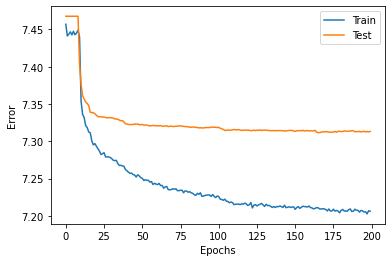

In [13]:
import matplotlib.pyplot as plt

plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

## 訓練済みのモデルを使用
訓練済みのモデルを使用して、応答文を生成します。 


In [14]:
seq2seq.eval()  # 評価モード

batch = next(iter(test_iterator))
x = batch.inp_text
y = seq2seq.predict(x)
print(y[0])
for i in range(x.size()[0]):
    inp_text = ""
    for j in range(x.size()[1]):
        inp_text += input_field.vocab.itos[x[i][j]]

    rep_text = ""
    for j in range(y.size()[1]):
        rep_text += reply_field.vocab.itos[y[i][j]]

    print("input:", inp_text)
    print("reply:", rep_text)
    print()

tensor([4, 6, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')
input: たまに耐えます<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
reply: ですね<eos><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>

input: 熱中症に気をつけです<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
reply: をしています。<eos><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>

input: 暇を<unk>た神<unk>の・・・<pad><pad><pad><pad><pad><pad><pad>
reply: んですね！<eos><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>

input: どんなのを書いたの？<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
reply: 。<eos><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>

input: 忙しすぎるのも嫌だけど、退屈すぎるのもちょっと嫌だよね
reply: がいいですね<eos><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>

input: 意味がわかりません<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
reply: が好きですね<eos><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>

input: 熱中症が出ますよねー<pad><pad><pad><pad><pad><pad>

## 問題点

*   Encoderへの入力には、バッチ内で要素数を揃えるために多数のパディング`<pad>`が末尾に含まれている。
*   誤差の計算に、文章の終了`<eos>`と、その後の`<pad>`が使われている。
*   過学習の問題。